In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 5.8 MB 57.6 MB/s 
     |████████████████████████████████| 1.6 MB 57.8 MB/s 
     |████████████████████████████████| 438 kB 77.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

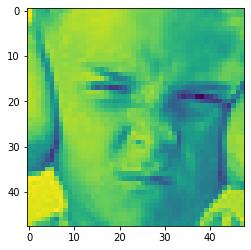

In [ ]:
DATADIR="/content/drive/MyDrive/Datasets/EmotionDetectionDS/images/train"
categories=["angry","disgust","fear","happy","neutral","sad","surprise"]
for category in categories:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  
        img_array = cv2.resize(img_array,(48,48))
        plt.imshow(img_array)  
        plt.show() 

        break
    break

In [ ]:
img_array.shape

(48, 48)

In [ ]:
data= []
for category in categories:
    path = os.path.join(DATADIR,category)
    label= categories.index(category)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array,(48,48))
        data.append([img_array,label])


In [ ]:
len(data)

35886

In [ ]:
data[:10]

[[array([[251, 207, 193, ..., 208, 204, 204],
         [251, 211, 195, ..., 204, 203, 202],
         [244, 205, 196, ..., 217, 218, 214],
         ...,
         [244, 245, 248, ..., 216, 238, 229],
         [245, 242, 243, ..., 191, 213, 247],
         [240, 223, 202, ..., 196, 186, 219]], dtype=uint8), 0],
 [array([[223, 248, 235, ...,  15,  69, 235],
         [222, 228, 227, ...,   4,  16, 211],
         [228, 221, 225, ...,   0,  15, 210],
         ...,
         [ 95, 100, 109, ..., 148, 125, 129],
         [ 94,  90,  97, ..., 156, 129, 124],
         [ 98, 115, 104, ..., 162, 135, 125]], dtype=uint8), 0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 252, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [137,  76,  31, ..., 255, 251, 255],
         [137, 148, 148, ..., 255, 252, 254],
         [149, 132, 143, ..., 255, 255, 254]], dtype=uint8), 0],
 [array([[ 34,  24,  20, ...,  18,  21,  21],
         [ 26,  22,  23, ..

In [ ]:
import random
random.shuffle(data)

In [ ]:
X=[]
y=[]
for features,label in data:
    X.append(features)
    y.append(label)

In [ ]:
y[0:10]

[3, 0, 6, 5, 3, 0, 3, 4, 5, 4]

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X.shape

(35886, 48, 48)

In [ ]:
y.shape

(35886,)

In [ ]:
X=X/255

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
X_train.shape

(21531, 48, 48)

In [ ]:
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [ ]:
no_of_classes = 7

model = Sequential()

In [ ]:
#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


#Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
history=model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/40
673/673 [==============================] - 13s 17ms/step - loss: 1.7941 - accuracy: 0.3104 - val_loss: 1.5495 - val_accuracy: 0.3861
Epoch 2/40
673/673 [==============================] - 10s 15ms/step - loss: 1.4395 - accuracy: 0.4410 - val_loss: 1.4206 - val_accuracy: 0.4565
Epoch 3/40
673/673 [==============================] - 10s 15ms/step - loss: 1.3092 - accuracy: 0.4976 - val_loss: 1.2971 - val_accuracy: 0.5055
Epoch 4/40
673/673 [==============================] - 10s 16ms/step - loss: 1.2257 - accuracy: 0.5304 - val_loss: 1.2725 - val_accuracy: 0.5254
Epoch 5/40
673/673 [==============================] - 10s 16ms/step - loss: 1.1737 - accuracy: 0.5528 - val_loss: 1.3564 - val_accuracy: 0.4782
Epoch 6/40
673/673 [==============================] - 11s 16ms/step - loss: 1.1241 - accuracy: 0.5710 - val_loss: 1.1344 - val_accuracy: 0.5777
Epoch 7/40
673/673 [==============================] - 11s 17ms/step - loss: 1.0799 - accuracy: 0.5914 - val_loss: 1.2359 - val_accuracy:

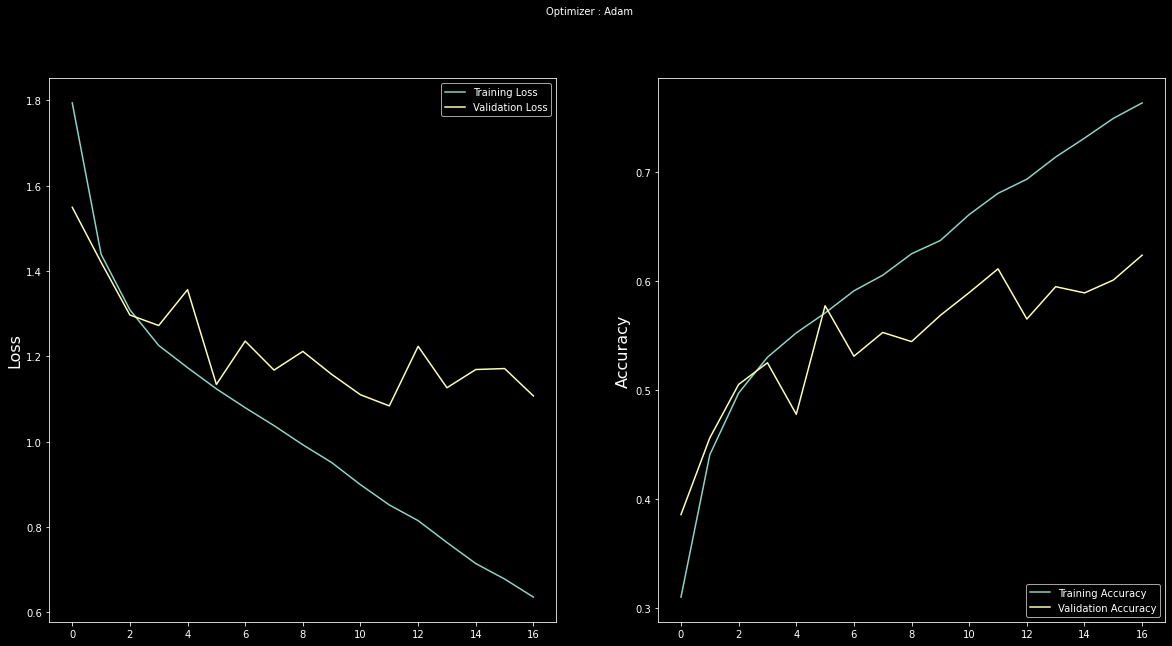

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()